# Book Recommendation System: LitWise!

In the vast world of books, one question echoes loudly: <b>"What should I read next?"</b> The immense library of human creation offers countless options, each book a new adventure waiting to be discovered. And that's where <b> LitWise </b> steps onto the stage—an indispensable digital companion with the remarkable ability to understand your reading preferences and unveil books that resonate with your heart.

Envision a world where book recommendations feel as if they were carefully selected by an insightful friend who knows your literary inclinations like the back of their hand. LitWise, a smart book recommendation system, brings this world to life. Through the marvels of data analysis and ingenious algorithms, it captures the essence of your reading habits, favorite genres, and the stories that you were intreseted in.

<h3> But how does this happen?</h3>  <br> Let us commence an exploration to comprehend recommendation systems.


Recommendation engines, a subset of machine learning, focus on allowing marketers to offer their customers relevant product recommendations in real-time. By using different algorithms and data analysis techniques, they recommend the most relevant products to a particular user. 

Major companies like Google, Instagram, Spotify, Amazon, Reddit, and Netflix employ recommendation systems to improve user interaction with their platforms.

<h3> How do recommendation engines work? </h3>

Typically, a recommendation engine processes data through the below four phases:

- Collection.
- Storing.
- Analyzing.
- Filtering. 

one of the crucial components behind the working of a product recommendation engine is the <b> recommender function </b>, which considers specific information about the user and predicts the rating that a user might assign to a product.
 

 
<h4> There are mainly three types of recommendation engines:</h4>

 
 - Collaborative Filtering: it's based on collecting and analyzing information and predicting what they will like based on        the similarity with other users.
 
 - Content-Based Filtering: They are based on the description of an item and a profile of the user's preferred choices.
 
 - Hybrid Recommendation Systems: they are essentially the combination of diverse rating and sorting algorithms.
 


<b>In this project </b>, we start by exploring our data to uncover its hidden insights. We then embark on an exciting journey to craft a strong book recommendation system. With precision and dedication, we'll create and evaluate various models to ensure our solution brings happiness to book enthusiasts and readers as much as possible.

<hr> 

<center> <h2> EDA </h2> <center>
    
 Let's start our EDA to explore the dataset.
    
 In this project we are using a book-recommendation dataset from Kaggle that Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004). It includes three tables as the following:
    
- Users 
    
 Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers.Demographic data is provided    (Location, Age) if available. Otherwise, these fields contain NULL-values.
    
    
- Books
    
  Books are identified by their respective ISBN. Moreover, some content-based information is given (Book-Title, Book-Author,     Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is     provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M,         Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.
    
    
- Ratings
    
 Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values   denoting higher appreciation), or implicit, expressed by 0.
    
    <b> Dataset link </b> : <a href= "https://drive.google.com/drive/folders/1xl2bpjT0hnhT3zieazrikMU4VCWoqPfI"> Book         Recommendation Dataset</a>

### Setting up the enivornment:

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

 #### Reading Book data

In [186]:
# Reading the data, specifying the semicolon (;) as the delimiter
books = pd.read_csv("../Dataset/BX-Books.csv", sep=";", error_bad_lines=False,encoding="latin-1" )

C:\Users\HP\AppData\Local\Temp\ipykernel_20192\694803224.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("../Dataset/BX-Books.csv", sep=";", error_bad_lines=False,encoding="latin-1" )
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 

In [187]:
# Retrieving top 5 views
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [188]:
print("Number of rows : ", books.shape[0])
print("Number of features : ", books.shape[1])

Number of rows :  271360
Number of features :  8


In [189]:
# Retrieving the list of features in the book df
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

<b> Here, we are summarizing the list of features, their data types, and the number of non-Null values in each one </b>

- we notice that all features are of object type and the data is almost completed ( a very few values from some columns are null)

In [190]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [191]:
#checking for null_values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [192]:
# checking for duplicates
books.duplicated().sum()

0

<b> The data has no duplicated rows, which indicates rows  distinctness </b>

<p> Given that the data comprises three well-maintained and valid image-related features, we have chosen to 
incorporate the 'large image URLs' feature since it might have a better resolution<p> 

In [193]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


Here, we are adjusting the column names to adhere to standardized naming conventions.

In [194]:
# renaming features
books.rename(columns={
    "Book-Title": "title",
    "Book-Author": "author",
    "Year-Of-Publication": "year",
    "Publisher": "publisher",
    "Image-URL-L": "img_url"}, inplace=True)
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


#### Reading User data

In [195]:
# reading users data
users = pd.read_csv("../Dataset/BX-Users.csv", sep=";", error_bad_lines=False,encoding="latin-1" )

C:\Users\HP\AppData\Local\Temp\ipykernel_20192\1853820466.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("../Dataset/BX-Users.csv", sep=";", error_bad_lines=False,encoding="latin-1" )


In [196]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [197]:
print ("Number of rows:  ", users.shape[0])
print("Number of columns : ", users.shape[1])

Number of rows:   278858
Number of columns :  3


Here, we are summarizing the users list of features with their datatypes and non-Null values counts

- noticing the summary, we find that the Age feature has lots of Null values

In [198]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [199]:
# retrieving the number of null ages
users['Age'].isnull().sum()

110762

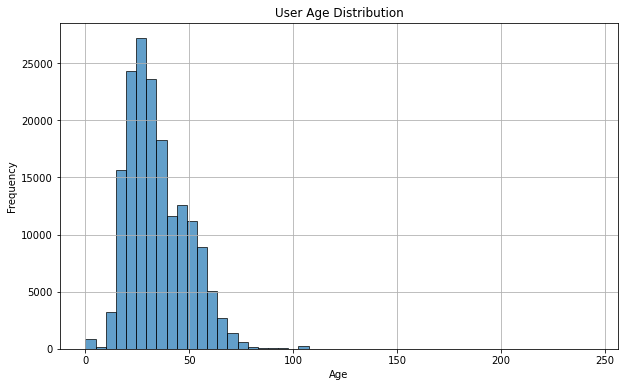

In [200]:
plt.figure(figsize=(10, 6))
plt.hist(users['Age'], bins=50, edgecolor='k', alpha=0.7)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Noticing the plot, we find:
- Some ages are zero while some of them are above 120, which indicates errornous data!

In [201]:
# Create a new DataFrame containing users with ages larger than 120
users_above_120 = users[users['Age'] > 120]
users_above_120.shape
# We have 78 users that have errornous age value(may we need to drop them ,because they are minority)

(78, 3)

In [202]:
users_ages_group = users.groupby(['Age']).size().reset_index(name='Count')
common_age = users_ages_group['Count'].max()
most_common_age = users_ages_group[users_ages_group['Count'] == common_age]
most_common_age

,Age,Count
24,24.0,5687


We find that most users are at the age of 24

In [203]:
least_common_age = users_ages_group[users_ages_group['Count'] == 1]
least_common_age

,Age,Count
95,95.0,1
107,107.0,1
109,109.0,1
110,110.0,1
111,111.0,1
116,118.0,1
117,119.0,1
120,127.0,1
121,128.0,1
122,132.0,1


We can find that Age column has lots of missing values and errornous ones . So we decided to drop it

In [204]:
users.drop('Age', axis=1, inplace=True)

#### Reading Ratings data

In [205]:
# reading ratings data
ratings = pd.read_csv("../Dataset/BX-Book-Ratings.csv", sep=";", error_bad_lines=False,encoding="latin-1" )

C:\Users\HP\AppData\Local\Temp\ipykernel_20192\1265045936.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv("../Dataset/BX-Book-Ratings.csv", sep=";", error_bad_lines=False,encoding="latin-1" )


In [232]:
ratings.head(5)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [233]:
print("Number of reviews: " , ratings.shape[0])
print("Number of features: ", ratings.shape[1])

Number of reviews:  1149780
Number of features:  3


In [234]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Noticing the above results of features info summary, no missing values are existed.

In [235]:
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [236]:
print("Books shape is: ", books.shape)
print("Users shape is: ", users.shape)
print("Ratings shape is:",ratings.shape)

Books shape is:  (271360, 6)
Users shape is:  (278858, 2)
Ratings shape is: (1149780, 3)


The varying shapes of the three datasets indicate differences in the number of unique books, users, and recorded ratings.  These differences in data volume may lead to varying coverage for different books and users, potentially affecting recommendation system performance and analysis outcomes.

#### Renaming ratings columns 

In [237]:
ratings.rename(columns= {
    "User-ID": "user_id" ,
    "Book-Rating": "rating" 
}, inplace=True)
ratings.head(5)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Given the distinct shapes of the three datasets, our initial exploration involves identifying the unique number of users who have provided ratings for one or more books in the dataset.

In [238]:
# number of unique users/reviewers
print('The number of unique users is :',ratings['user_id'].unique().shape)
print('The number of reviews is :',ratings.shape)

The number of unique users is : (105283,)
The number of reviews is : (1149780, 3)


So according to the results about 105283 users have given one or more ratings 

<b> Here, we are finding the number of ratings given by each user </b>

In [239]:
ratings['user_id'].value_counts().reset_index(name="Reviews_per_user")

,index,Reviews_per_user
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


In [240]:
ratings_per_user=ratings['user_id'].value_counts()
ratings_per_user.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: user_id, dtype: float64

The dataset appears to have a highly skewed distribution, with a vast majority of values clustered around 1, that may incidates that the majority of users are new ones or not active users. But a few extreme  values as high as 13,602, suggesting potential data anomalies or unique cases that warrant further examination.

So, here we are trying to investigate more in this.

In [241]:
users_of_more_50_reviews = ratings['user_id'].value_counts() > 50
users_of_more_50_reviews.value_counts()

False    101912
True       3371
Name: user_id, dtype: int64

In [242]:
users_of_more_200_reviews = ratings['user_id'].value_counts() > 200
users_of_more_200_reviews.value_counts()

False    104384
True        899
Name: user_id, dtype: int64

In [243]:
users_of_more_500_reviews = ratings['user_id'].value_counts() > 500
users_of_more_500_reviews.value_counts()

False    104996
True        287
Name: user_id, dtype: int64

In [244]:
users_of_less_200_reviews = ratings['user_id'].value_counts() <200
users_of_less_200_reviews.value_counts()

True     104378
False       905
Name: user_id, dtype: int64

We decided not to drop the users with low numbers of reviews, as they might be new ones.

In [245]:
ratings.shape

(1149780, 3)

Here, we are joining books and ratings tables based on ISBN feature.

In [246]:
ratings_with_books = ratings.merge(books, on = "ISBN")
ratings_with_books.head(3)

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


In [247]:
ratings_with_books.shape

(1031136, 8)

We are categorizing the given ratings by the book title, then finding the number of ratings are given for each book.
This can leads to have more insights about the popularity and engagement level of different books, facilitating tasks like identifying bestsellers and user preferences analysis.

In [248]:
# categorizing ratings by title and counting the number of ratings for each book
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [249]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [250]:
num_rating[['rating']].describe()

,rating
count,241071.000000
mean,4.277312
std,16.738685
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2502.000000


The statistical summary of number of ratings per book reveals that the majority of books have relatively few ratings, with a median value of 1 rating per book. However, there are ones with a maximum of 2,502 ratings, indicating the presence of highly popular books that have garnered significant attention and engagement from users. 


In [251]:
num_rating['rating'].unique()

array([   4,    1,    2,   10,    9,   11,   17,    3,    5,   47,    8,
          6,   12,   22,    7,   61,   13,   23,   37,   28,   65,   14,
         20,  284,  509,   24,   25,   90,   21,   71,   57,  106,   30,
        356,   85,  151,   16,   50,   31,  125,   41,   74,   44,   46,
         32,   18,  136,   15,  346,   35,   29,   26,   38,  236,   27,
        265,  156,   33,   52,   83,   67,   81,  139,   92,   54,  108,
         39,  140,  116,   40,   42,   34,   48,  169,  104,   99,  302,
        285,   86,  192,  109,   59,   75,  128,  174,  327,   19,   49,
         36,   51,   66,  838,   68,  149,   64,   82,   63,   76,  413,
         60,   56,  118,   78,   45,   95,   62,   43,   97,  135,  210,
        549,   96,  101,  164,  205,  378,  273,   53,  158,  150,   70,
         69,  279,  262,  121,  126,   77,  141,  332,  112,   84,  187,
         58,  258,   55,  184,  147,  304,  110,   93,  114,   91,   72,
         94,   80,  326,  222,  170,  670,  167,  2

In [252]:
num_rating['rating'].value_counts()

1      127513
2       42729
3       20255
4       11364
5        7529
        ...  
588         1
575         1
428         1
347         1
234         1
Name: rating, Length: 377, dtype: int64

While we initially considered books with a low number of reviews as potentially not recommended, we opted not to exclude them from our analysis. This decision was influenced by the possibility that these books may be newly added to the dataset, and we wanted to ensure that all books had an opportunity to be included in our recommendations.

In [132]:
num_rating.rename(columns = {
    'rating':'num_of_ratings'
}, inplace=True)

Here, We Combine the 'ratings_with_books' Data with the 'num_rating' Data based on the 'title' column to associate each book's rating count with its respective rating data.

In [135]:
final_rating = ratings_with_books.merge(num_rating, on = "title")

In [136]:
final_rating.head(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,60


In [137]:
final_rating.shape

(1031136, 9)

<b> Here, we are categorizing the books by their author name</b>

In [143]:
author_ratings = final_rating.groupby('author')['num_of_ratings'].sum().reset_index()
author_ratings

,author,num_of_ratings
0,D. Chiel,16
1,J. D. Landis,2
2,Mimma Balia,1
3,'N Sync,1
4,142 moms from all over the world,1
...,...,...
101583,Â¢ystein LÂ²nn,1
101584,Ã?dÃ¶n von HorvÃ¡th,6
101585,Ã?Â?dÃ?Â¶n von Horvath,4
101586,Ã?Â?pictÃ?Â¨te,4


In [145]:
author_rating = final_rating.groupby('author')['num_of_ratings'].sum().reset_index()

# Sorting the DataFrame in descending order based on the total ratings
author_ratings_sorted = author_ratings.sort_values(by='num_of_ratings', ascending=False)

# Get the top 10 authors with the highest total ratings
top_10_authors = author_ratings_sorted.head(10)

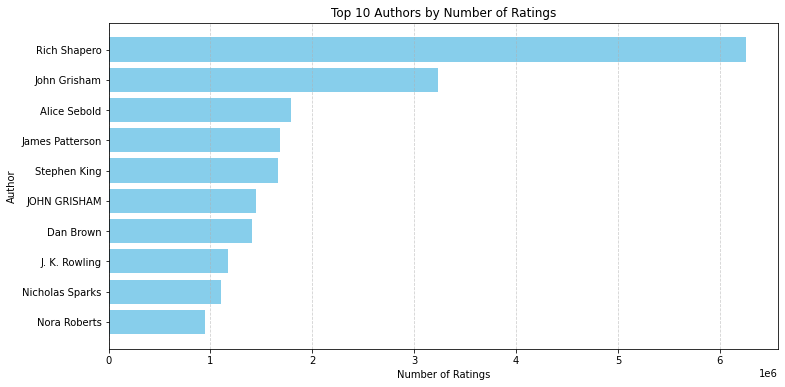

In [148]:
plt.figure(figsize=(12, 6))
plt.barh(top_10_authors['author'], top_10_authors['num_of_ratings'], color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest at the top
plt.title('Top 10 Authors by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Author')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The plot elegantly displays the top ten celebrated authors alongside the corresponding number of ratings they have received.
<b> Rich Shapero </b> is the most celebrated one.

In [256]:
final_rating.sample(10)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
457343,256251,0394839102,0,The Berenstain Bears and the Spooky Old Tree (...,Stan Berenstain,1989,Random House Children's Books,http://images.amazon.com/images/P/0394839102.0...,6
720185,205735,0373705786,0,Last Buccaneer (Paranormal) (Harlequin Superro...,Lynn Erickson,1993,Harlequin,http://images.amazon.com/images/P/0373705786.0...,5
966741,175886,0373098316,0,Groom Wanted (From This Day Forward) (Silhouet...,Debbie MacOmber,1993,Silhouette,http://images.amazon.com/images/P/0373098316.0...,2
1020780,251613,0943358019,0,Wisdom of the Tarot,Elizabeth Haich,1983,Aurora Press,http://images.amazon.com/images/P/0943358019.0...,1
185276,108128,0446604275,0,Primary Colors: A Novel of Politics,Anonymous,1996,Warner Books,http://images.amazon.com/images/P/0446604275.0...,166
288445,37538,0380713810,10,Made in America,Bill Bryson,1996,Perennial,http://images.amazon.com/images/P/0380713810.0...,21
352812,194172,0449002985,0,Your Oasis on Flame Lake (Ballantine Reader's ...,LORNA LANDVIK,1998,Ballantine Books,http://images.amazon.com/images/P/0449002985.0...,38
400315,12538,0553230360,0,Beasts,John Crowley,1983,Bantam Books (Mm),http://images.amazon.com/images/P/0553230360.0...,12
498742,142524,0064471101,0,The Magician's Nephew (rack) (Narnia),C. S. Lewis,2002,HarperCollins,http://images.amazon.com/images/P/0064471101.0...,67
536332,127564,0786889616,0,Parallel Lies,Ridley Pearson,2002,Hyperion Press,http://images.amazon.com/images/P/0786889616.0...,74


In [257]:
final_rating.shape

(1026358, 9)

<b> Here we handle a common data scenario where users may submit multiple reviews for the same book at different times. We are doing this to ensure the data consistency. </b>

In [157]:
final_rating.drop_duplicates(['title','user_id'], inplace = True)

In [258]:
final_rating.shape

(1026358, 9)

In [259]:
final_rating.sample(7)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_ratings
734064,160393,0806519762,0,The 100 Most Influential Women of All Time: A ...,Deborah Felder,1998,Citadel Press,http://images.amazon.com/images/P/0806519762.0...,2
464623,20501,3442453305,9,Herr Lehmann.,Sven Regener,2003,Goldmann,http://images.amazon.com/images/P/3442453305.0...,39
390687,187029,045120834X,0,Murder of a Snake in the Grass (Scumble River ...,Denise Swanson,2003,Signet Book,http://images.amazon.com/images/P/045120834X.0...,13
397513,107021,0446524131,0,Something More: Excavating Your Authentic Self,Sarah Ban Breathnach,1998,Warner Books,http://images.amazon.com/images/P/0446524131.0...,50
577022,78783,0671683144,0,Sing to Me of Dreams,Kathryn Lynn Davis,1992,Pocket Books,http://images.amazon.com/images/P/0671683144.0...,16
533073,225810,0446350397,0,Freaky Deaky,Elmore Leonard,1989,Warner Books,http://images.amazon.com/images/P/0446350397.0...,29
380259,143415,0380792486,0,Outlaw Mountain: A Joanna Brady Mystery,J.A. Jance,2004,Avon,http://images.amazon.com/images/P/0380792486.0...,40


In this exploratory data analysis (EDA), we've meticulously examined the book recommendation dataset. We began by addressing missing values to ensure data integrity. Next, we explored feature values, gaining insights into books, user interactions, and ratings. Notably, we strategically combined three tables—book information, user details, and user ratings—into a final rating dataset, primed for training recommendation models.

This EDA has laid a solid foundation for our next steps: the development of efficient recommendation algorithms. Our next step is to start with modeling and training process.
